In [1]:
import gym
from gym.spaces import Dict, Discrete, Box, Tuple
import numpy as np


class SampleGym(gym.Env):
    def __init__(self, config={}):
        self.config = config
        self.action_space = Tuple((Discrete(2), Box(-10, 10, (2,))))
        self.observation_space = Box(-10, 10, (2, 2))
        self.p_done = config.get("p_done", 0.1)

    def reset(self):
        return self.observation_space.sample()

    def step(self, action):
        chosen_action = action[0]
        cnt_control = action[1][chosen_action]

        if chosen_action == 0:
            reward = cnt_control
        else:
            reward = -cnt_control - 1

        print(f"Action, {chosen_action} continuous ctrl {cnt_control}")
        return (
            self.observation_space.sample(),
            reward,
            bool(np.random.choice([True, False], p=[self.p_done, 1.0 - self.p_done])),
            {},
        )


if __name__ == "__main__":
    env = SampleGym()
    env.reset()
    env.step((1, [-1, 2.1]))  # should say use action 1 with 2.1
    env.step((0, [-1.1, 2.1]))  # should say use action 0 with -1.1

Action, 1 continuous ctrl 2.1
Action, 0 continuous ctrl -1.1


In [2]:
from mlagents_envs.environment import UnityEnvironment
import numpy as np

ENV_PATH = "../Build-ParallelEnv/Aimbot-ParallelEnv"
WORKER_ID = 1
BASE_PORT = 2002

env = UnityEnvironment(
    file_name=ENV_PATH,
    seed=1,
    side_channels=[],
    worker_id=WORKER_ID,
    base_port=BASE_PORT,
)

trackedAgent = 0
env.reset()
BEHA_SPECS = env.behavior_specs
BEHA_NAME = list(BEHA_SPECS)[0]
SPEC = BEHA_SPECS[BEHA_NAME]
print(SPEC)

decisionSteps, terminalSteps = env.get_steps(BEHA_NAME)

if trackedAgent in decisionSteps:  # ゲーム終了していない場合、環境状態がdecision_stepsに保存される
    nextState = decisionSteps[trackedAgent].obs[0]
    reward = decisionSteps[trackedAgent].reward
    done = False
if trackedAgent in terminalSteps:  # ゲーム終了した場合、環境状態がterminal_stepsに保存される
    nextState = terminalSteps[trackedAgent].obs[0]
    reward = terminalSteps[trackedAgent].reward
    done = True
print(decisionSteps.agent_id)
print(terminalSteps)


In [ ]:
print("decisionSteps.agent_id",decisionSteps.agent_id)
# decisionSteps.agent_id [1 2 5 7]
print("decisionSteps.agent_id_to_index",decisionSteps.agent_id_to_index)
# decisionSteps.agent_id_to_index {1: 0, 2: 1, 5: 2, 7: 3}
print("decisionSteps.reward",decisionSteps.reward)
# decisionSteps.reward [0. 0. 0. 0.]
print("decisionSteps.action_mask",decisionSteps.action_mask)
'''
decisionSteps.action_mask [array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]]), array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]]), array([[False, False],
       [False, False],
       [False, False],
       [False, False]])]
'''
print("decisionSteps.obs", decisionSteps.obs[0][0])
'''decisionSteps.obs [array([[-15.994009 ,   1.       , -26.322788 ,   1.       ,   1.       ,
          1.       ,   1.       ,   1.       ,   1.       ,   2.       ,
          1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
          1.       ,   1.       ,   1.3519633,   1.6946528,   2.3051548,
          3.673389 ,   9.067246 ,  17.521473 ,  21.727095 ,  22.753294 ,
         24.167128 ,  25.905216 ,  18.35725  ,  21.02278  ,  21.053417 ,
          0.       ],
       [ -1.8809433,   1.       , -25.66834  ,   1.       ,   2.       ,
          1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
          1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
          1.       ,   1.       ,  16.768637 ,  23.414627 ,  22.04486  ,
         21.050663 ,  20.486784 ,  20.486784 ,  21.050665 ,  15.049731 ,
         11.578419 ,   9.695194 ,  20.398016 ,  20.368341 ,  20.398016 ,
...
         20.551746 ,  20.00118  ,  20.001116 ,  20.551594 ,  21.5222   ,
         17.707508 ,  14.86889  ,  19.914494 ,  19.885508 ,  19.914463 ,
          0.       ]], dtype=float32)]'''


decisionSteps.agent_id [1 2 5 7]
decisionSteps.agent_id_to_index {1: 0, 2: 1, 5: 2, 7: 3}
decisionSteps.reward [0. 0. 0. 0.]
decisionSteps.action_mask [array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]]), array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]]), array([[False, False],
       [False, False],
       [False, False],
       [False, False]])]
decisionSteps.obs [  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0. 

'decisionSteps.obs [array([[-15.994009 ,   1.       , -26.322788 ,   1.       ,   1.       ,\n          1.       ,   1.       ,   1.       ,   1.       ,   2.       ,\n          1.       ,   1.       ,   1.       ,   1.       ,   1.       ,\n          1.       ,   1.       ,   1.3519633,   1.6946528,   2.3051548,\n          3.673389 ,   9.067246 ,  17.521473 ,  21.727095 ,  22.753294 ,\n         24.167128 ,  25.905216 ,  18.35725  ,  21.02278  ,  21.053417 ,\n          0.       ],\n       [ -1.8809433,   1.       , -25.66834  ,   1.       ,   2.       ,\n          1.       ,   1.       ,   1.       ,   1.       ,   1.       ,\n          1.       ,   1.       ,   1.       ,   1.       ,   1.       ,\n          1.       ,   1.       ,  16.768637 ,  23.414627 ,  22.04486  ,\n         21.050663 ,  20.486784 ,  20.486784 ,  21.050665 ,  15.049731 ,\n         11.578419 ,   9.695194 ,  20.398016 ,  20.368341 ,  20.398016 ,\n...\n         20.551746 ,  20.00118  ,  20.001116 ,  20.551594 ,  21.

In [1]:
from AimbotEnv import Aimbot

ENV_PATH = "../Build-ParallelEnv/Aimbot-ParallelEnv"
WORKER_ID = 1
BASE_PORT = 2002

env = Aimbot(envPath=ENV_PATH,workerID= WORKER_ID,basePort= BASE_PORT)


In [8]:
import numpy as np
env.unity_observation_shape
(128, 4) + env.unity_observation_shape
env.reset()

(array([[  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       , -15.994009 ,   1.       , -26.322788 ,   1.       ,
           1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
           2.       ,   1.       ,   1.       ,   1.       ,   1.       ,
           1.       ,   1.       ,   1.       ,   1.3519633,   1.6946528,
           2.3051548,   3.673389 ,   9.067246 ,  17.521473 ,  21.727095 ,
          22.753294 ,  24.167128 ,  25.905216 ,  18.35725  ,  21.02278  ,
          21.053417 ,   0.       , -15.994003 ,   1.       , -26.322784 ,
           1.       ,   1.       ,   1

In [4]:
import torch
aa = torch.tensor([[1,2,3],[1,2,3],[1,2,3],[1,2,3]]).to("cuda:0")
bb = torch.tensor([[1],[2],[3],[4]]).to("cuda:0")
print(aa)
print(bb)
torch.cat([aa,bb],axis = 1)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]], device='cuda:0')
tensor([[1],
        [2],
        [3],
        [4]], device='cuda:0')


tensor([[1, 2, 3, 1],
        [1, 2, 3, 2],
        [1, 2, 3, 3],
        [1, 2, 3, 4]], device='cuda:0')

In [7]:
import torch
from torch import nn

def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer

class PPOAgent(nn.Module):
    def __init__(self, env: Aimbot):
        super(PPOAgent, self).__init__()
        self.discrete_size = env.unity_discrete_size
        self.discrete_shape = list(env.unity_discrete_branches)
        self.continuous_size = env.unity_continuous_size

        self.network = nn.Sequential(
            layer_init(nn.Linear(np.array(env.unity_observation_shape).prod(), 256)),
            nn.ReLU(),
            layer_init(nn.Linear(256, 128)),
            nn.ReLU(),
        )
        self.actor_dis = layer_init(nn.Linear(128, self.discrete_size), std=0.01)
        self.actor_mean = layer_init(nn.Linear(128, self.continuous_size), std=0.01)
        self.actor_logstd = nn.Parameter(torch.zeros(1, self.continuous_size))
        self.critic = layer_init(nn.Linear(128, 1), std=1)

    def get_value(self, state: torch.Tensor):
        return self.critic(self.network(state))

    def get_actions_value(self, state: torch.Tensor, actions=None):
        hidden = self.network(state)
        # discrete
        dis_logits = self.actor_dis(hidden)
        split_logits = torch.split(dis_logits, self.discrete_shape, dim=1)
        multi_categoricals = [Categorical(logits=thisLogits) for thisLogits in split_logits]
        # continuous
        actions_mean = self.actor_mean(hidden)
        action_logstd = self.actor_logstd.expand_as(actions_mean)
        action_std = torch.exp(action_logstd)
        con_probs = Normal(actions_mean, action_std)

        if actions is None:
            disAct = torch.stack([ctgr.sample() for ctgr in multi_categoricals])
            conAct = con_probs.sample()
            actions = torch.cat([disAct.T, conAct], dim=1)
        else:
            disAct = actions[:, 0 : env.unity_discrete_type].T
            conAct = actions[:, env.unity_discrete_type :]
        dis_log_prob = torch.stack(
            [ctgr.log_prob(act) for act, ctgr in zip(disAct, multi_categoricals)]
        )
        dis_entropy = torch.stack([ctgr.entropy() for ctgr in multi_categoricals])
        return (
            actions,
            dis_log_prob.sum(0),
            dis_entropy.sum(0),
            con_probs.log_prob(conAct).sum(1),
            con_probs.entropy().sum(1),
            self.critic(hidden),
        )


mymodel = torch.load("../PPO-Model/SmallArea-256-128-hybrid.pt")
mymodel.eval()

AttributeError: Can't get attribute 'PPOAgent' on <module '__main__'>

In [ ]:
import torch
import numpy as np

x = torch.randn(2, 3).to("cuda")
print(x)
print(torch.cat((x, x, x), 0))
print(torch.cat((x, x, x), 1))

aa = torch.empty(0).to("cuda")
torch.cat([aa,x])
bb = [[]]*2
print(bb)
bb.append(x.to("cpu").tolist())
bb.append(x.to("cpu").tolist())
print(bb)

In [64]:
import numpy as np
import torch

agent_num = 8
ob_buffer = [[]for i in range(agent_num)]
obs =  torch.randn(8, 3).to("cuda")
print(obs)
print(np.shape(np.array(ob_buffer)))
print('---')
obs_cpu = obs.to("cpu").numpy()
for i in range(agent_num):
    ob_buffer[i].append(obs_cpu[i])
print(ob_buffer)
ob_buffer[1] = []
print(ob_buffer)
print('---')
for i in range(agent_num):
    ob_buffer[i].append(obs_cpu[i])
print(ob_buffer[0])
vvv = torch.tensor(ob_buffer[0]).to("cuda")
print("vvv",vvv)
empt = torch.tensor([]).to("cuda")
vvvv = torch.cat((empt,vvv),0)
print(vvvv)
vvvv.size()[0]>0

tensor([[-1.1090,  0.4686,  0.6883],
        [-0.1862, -0.3943, -0.0202],
        [ 0.1436, -0.9444, -1.2079],
        [-2.9434, -2.5989, -0.6653],
        [ 0.4668,  0.8548, -0.4641],
        [-0.3956, -0.2832, -0.1889],
        [-0.2801, -0.2092,  1.7254],
        [ 2.7938, -0.7742,  0.7053]], device='cuda:0')
(8, 0)
---
[[array([-1.1090169,  0.4685607,  0.6883437], dtype=float32)], [array([-0.1861974 , -0.39429024, -0.02016036], dtype=float32)], [array([ 0.14360362, -0.9443668 , -1.2079065 ], dtype=float32)], [array([-2.9433894 , -2.598913  , -0.66532046], dtype=float32)], [array([ 0.46684313,  0.8547877 , -0.46408093], dtype=float32)], [array([-0.39563984, -0.2831819 , -0.18891   ], dtype=float32)], [array([-0.28008553, -0.20918302,  1.7253567 ], dtype=float32)], [array([ 2.7938051, -0.7742478,  0.705279 ], dtype=float32)]]
[[array([-1.1090169,  0.4685607,  0.6883437], dtype=float32)], [], [array([ 0.14360362, -0.9443668 , -1.2079065 ], dtype=float32)], [array([-2.9433894 , -2.5989

True

In [6]:
from AimbotEnv import Aimbot
from enum import Enum
import uuid
from mlagents_envs.side_channel.side_channel import (
    SideChannel,
    IncomingMessage,
    OutgoingMessage,
)
from typing import List

class Targets(Enum):
    Free = 0
    Go = 1
    Attack = 2
    Num = 3
TotalRounds = {"Go":0,"Attack":0,"Free":0}
WinRounds = {"Go":0,"Attack":0,"Free":0}

class AimbotSideChannel(SideChannel):
    def __init__(self, channel_id: uuid.UUID) -> None:
        super().__init__(channel_id)
    def on_message_received(self, msg: IncomingMessage) -> None:
        """
        Note: We must implement this method of the SideChannel interface to
        receive messages from Unity
        """
        thisMessage = msg.read_string()
        #print(thisMessage)
        thisResult = thisMessage.split("|")
        if(thisResult[0] == "result"):
            TotalRounds[thisResult[1]]+=1
            if(thisResult[2] == "Win"):
                WinRounds[thisResult[1]]+=1
            #print(TotalRounds)
            #print(WinRounds)
        elif(thisResult[0] == "Error"):
            print(thisMessage)
	# 发送函数
    def send_string(self, data: str) -> None:
        """发送一个字符串给C#"""
        msg = OutgoingMessage()
        msg.write_string(data)
        super().queue_message_to_send(msg)

    def send_bool(self, data: bool) -> None:
        msg = OutgoingMessage()
        msg.write_bool(data)
        super().queue_message_to_send(msg)

    def send_int(self, data: int) -> None:
        msg = OutgoingMessage()
        msg.write_int32(data)
        super().queue_message_to_send(msg)

    def send_float(self, data: float) -> None:
        msg = OutgoingMessage()
        msg.write_float32(data)
        super().queue_message_to_send(msg)

    def send_float_list(self, data: List[float]) -> None:
        msg = OutgoingMessage()
        msg.write_float32_list(data)
        super().queue_message_to_send(msg)
        
SIDE_CHANNEL_UUID = uuid.UUID("8bbfb62a-99b4-457c-879d-b78b69066b5e")
ENV_PATH = "../Build/Build-ParallelEnv-Target-OffPolicy-SingleStack-SideChannel-EndReward/Aimbot-ParallelEnv"
aimBotsideChannel = AimbotSideChannel(SIDE_CHANNEL_UUID)
env = Aimbot(envPath=ENV_PATH, workerID=123, basePort=999,side_channels=[aimBotsideChannel])

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions.normal import Normal
from torch.distributions.categorical import Categorical
device = torch.device("cuda" if torch.cuda.is_available() and True else "cpu")

def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer

class PPOAgent(nn.Module):
    def __init__(self, env: Aimbot,targetNum:int):
        super(PPOAgent, self).__init__()
        self.targetNum = targetNum
        self.discrete_size = env.unity_discrete_size
        self.discrete_shape = list(env.unity_discrete_branches)
        self.continuous_size = env.unity_continuous_size

        self.network = nn.Sequential(
            layer_init(nn.Linear(np.array(env.unity_observation_shape).prod(), 500)),
            nn.ReLU(),
            layer_init(nn.Linear(500, 300)),
            nn.ReLU(),
        )
        self.actor_dis = nn.ModuleList([layer_init(nn.Linear(300, self.discrete_size), std=0.01) for i in range(targetNum)])
        self.actor_mean = nn.ModuleList([layer_init(nn.Linear(300, self.continuous_size), std=0.01) for i in range(targetNum)])
        self.actor_logstd = nn.ParameterList([nn.Parameter(torch.zeros(1, self.continuous_size)) for i in range(targetNum)])
        self.critic = layer_init(nn.Linear(300, 1), std=1)

    def get_value(self, state: torch.Tensor):
        return self.critic(self.network(state))

    def get_actions_value(self, state: torch.Tensor, actions=None):
        hidden = self.network(state)
        targets = torch.argmax(state[:,0:self.targetNum],dim=1)

        # discrete
        # 递归targets的数量,既agent数来实现根据target不同来选用对应的输出网络计算输出
        dis_logits = torch.stack([self.actor_dis[targets[i]](hidden[i]) for i in range(targets.size()[0])])
        split_logits = torch.split(dis_logits, self.discrete_shape, dim=1)
        multi_categoricals = [Categorical(logits=thisLogits) for thisLogits in split_logits]
        # continuous
        actions_mean = torch.stack([self.actor_mean[targets[i]](hidden[i]) for i in range(targets.size()[0])]) # self.actor_mean(hidden)
        # action_logstd = torch.stack([self.actor_logstd[targets[i]].expand_as(actions_mean) for i in range(targets.size()[0])]) # self.actor_logstd.expand_as(actions_mean)
        # print(action_logstd)
        action_std = torch.squeeze(torch.stack([torch.exp(self.actor_logstd[targets[i]]) for i in range(targets.size()[0])]),dim = -1) # torch.exp(action_logstd)
        con_probs = Normal(actions_mean, action_std)

        if actions is None:
            if True:
                # select actions base on probability distribution model
                disAct = torch.stack([ctgr.sample() for ctgr in multi_categoricals])
                conAct = con_probs.sample()
                actions = torch.cat([disAct.T, conAct], dim=1)
            else:
                # select actions base on best probability distribution
                disAct = torch.stack([torch.argmax(logit, dim=1) for logit in split_logits])
                conAct = actions_mean
                actions = torch.cat([disAct.T, conAct], dim=1)
        else:
            disAct = actions[:, 0 : env.unity_discrete_type].T
            conAct = actions[:, env.unity_discrete_type :]
        dis_log_prob = torch.stack(
            [ctgr.log_prob(act) for act, ctgr in zip(disAct, multi_categoricals)]
        )
        dis_entropy = torch.stack([ctgr.entropy() for ctgr in multi_categoricals])
        return (
            actions,
            dis_log_prob.sum(0),
            dis_entropy.sum(0),
            con_probs.log_prob(conAct).sum(1),
            con_probs.entropy().sum(1),
            self.critic(hidden),
        )
agent = PPOAgent(env,4).to(device)

In [7]:
state,_,_ = env.getSteps()
state

array([[  1.        , -10.343613  ,   0.        ,  -7.367299  ,
          0.        ,   0.        ,  30.        , -10.343662  ,
          1.        , -33.708736  ,   1.        ,   1.        ,
          1.        ,   1.        ,   2.        ,   1.        ,
          1.        ,   1.        ,   2.        ,   2.        ,
          2.        ,   1.        ,   1.        ,   1.        ,
         33.270493  ,  39.50663   ,  49.146526  ,  32.595673  ,
         30.21616   ,  21.163797  ,  46.9299    ,   1.3264331 ,
          1.2435672 ,   1.2541904 ,  30.08522   ,  30.041445  ,
         21.072094  ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  30.        ,  -5.5892515 ,
          1.        , -29.907726  ,   1.        ,   1.        ,
          1.        ,   1.        ,   2.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
   

In [8]:
env.close()

In [6]:
import torch
from torch.distributions.categorical import Categorical

aaa = torch.tensor([[1,2,3,4,5,6,7,8] for i in range(10)])
aaasplt = torch.split(aaa,[3,3,2],dim=1)
multicate = [Categorical(logits=thislo) for thislo in aaasplt]
disact = torch.stack([ctgr.sample() for ctgr in multicate])
#print(aaa)
#print(aaasplt)
torch.cat([aaa[:,1:3],aaa[:,4:]],dim=1)

tensor([[2, 3, 5, 6, 7, 8],
        [2, 3, 5, 6, 7, 8],
        [2, 3, 5, 6, 7, 8],
        [2, 3, 5, 6, 7, 8],
        [2, 3, 5, 6, 7, 8],
        [2, 3, 5, 6, 7, 8],
        [2, 3, 5, 6, 7, 8],
        [2, 3, 5, 6, 7, 8],
        [2, 3, 5, 6, 7, 8],
        [2, 3, 5, 6, 7, 8]])

In [78]:
import torch
from torch.distributions.categorical import Categorical

logits = torch.Tensor([[0.5,0.25]])
lgst = Categorical(logits=logits)

In [62]:
# calculate entropy of log probability
def entropy(logits):
    a0 = logits - logits.max(1, keepdim=True)[0]
    print(a0)
    ea0 = torch.exp(a0)
    print(ea0)
    z0 = ea0.sum(1, keepdim=True)
    print(z0)
    p0 = ea0 / z0
    print(p0)
    return (p0 * (torch.log(z0) - a0)).sum(1, keepdim=True)
entropy(logits)

tensor([[ 0.0000, -0.2500]])
tensor([[1.0000, 0.7788]])
tensor([[1.7788]])
tensor([[0.5622, 0.4378]])


tensor([[0.6854]])

In [87]:
probs = torch.Tensor([[0.5,0.25,0.25]])
print(probs)
# calculate entropy of probability
def entropy2(probs):
    return -(probs * torch.log(probs)).sum(1, keepdim=True)
print(entropy2(probs))
lgst2 = Categorical(probs=probs)
lgst2.entropy()

tensor([[0.5000, 0.2500, 0.2500]])
tensor([[1.0397]])


tensor([1.0397])

In [91]:
from torch.distributions.normal import Normal
mu = torch.Tensor([[1]])
sigma = torch.Tensor([[2]])
# calculate entropy of Normal distribution
def entropy3(mu,sigma):
    return 0.5 * (1 + torch.log(2 * sigma * sigma * 3.1415926))

print(entropy3(mu,sigma))
nm = Normal(mu,sigma)
nm.entropy()

tensor([[2.1121]])


tensor([[2.1121]])

In [1]:
import numpy as np
import torch
import torch.nn as nn

from AimbotEnv import Aimbot
from enum import Enum
from torch.distributions.normal import Normal
from torch.distributions.categorical import Categorical

DEFAULT_SEED = 9331
ENV_PATH = "../Build/3.0/Mix/Aimbot-ParallelEnv"
WAND_ENTITY = "koha9"
WORKER_ID = 1
BASE_PORT = 1000

# tensorboard names
game_name = "Aimbot_Target_Hybrid_PMNN_V3"
game_type = "PList_Mix_LeakyReLU_512Batch"

# max round steps per agent is 2500/Decision_period, 25 seconds
# !!!check every parameters before run!!!

TOTAL_STEPS = 3150000
BATCH_SIZE = 512
MAX_TRAINNING_DATASETS = 6000
DECISION_PERIOD = 1
LEARNING_RATE = 6.5e-4
GAMMA = 0.99
GAE_LAMBDA = 0.95
EPOCHS = 3
CLIP_COEF = 0.11
LOSS_COEF = [1.0, 1.0, 1.0, 1.0] # free go attack defence
POLICY_COEF = [1.0, 1.0, 1.0, 1.0]
ENTROPY_COEF = [0.05, 0.05, 0.05, 0.05]
CRITIC_COEF = [0.5, 0.5, 0.5, 0.5]
TARGET_LEARNING_RATE = 1e-6
FREEZE_VIEW_NETWORK = False

BROADCASTREWARD = False
ANNEAL_LEARNING_RATE = True
CLIP_VLOSS = True
NORM_ADV = False
TRAIN = True
SAVE_MODEL = True
WANDB_TACK = True
LOAD_DIR = None
LOAD_DIR = "../PPO-Model/PList_Goto_LeakyReLU_256Batch_9331_1678785562/PList_Goto_LeakyReLU_256Batch_9331_1678785562_8.370919.pt"

# public data
class Targets(Enum):
    Free = 0
    Go = 1
    Attack = 2
    Defence = 3
    Num = 4
TARGET_STATE_SIZE = 6
INAREA_STATE_SIZE = 1
TIME_STATE_SIZE = 1
GUN_STATE_SIZE = 1
MY_STATE_SIZE = 4
TOTAL_T_SIZE = TARGET_STATE_SIZE+INAREA_STATE_SIZE+TIME_STATE_SIZE+GUN_STATE_SIZE+MY_STATE_SIZE
BASE_WINREWARD = 999
BASE_LOSEREWARD = -999
TARGETNUM= 4
ENV_TIMELIMIT = 30
RESULT_BROADCAST_RATIO = 1/ENV_TIMELIMIT

def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer


class PPOAgent(nn.Module):
    def __init__(self, env: Aimbot,targetNum:int):
        super(PPOAgent, self).__init__()
        self.targetNum = targetNum
        self.stateSize = env.unity_observation_shape[0]
        self.agentNum = env.unity_agent_num
        self.targetSize = TARGET_STATE_SIZE
        self.timeSize = TIME_STATE_SIZE
        self.gunSize = GUN_STATE_SIZE
        self.myStateSize = MY_STATE_SIZE
        self.raySize = env.unity_observation_shape[0] - TOTAL_T_SIZE
        self.nonRaySize = TOTAL_T_SIZE
        self.head_input_size = env.unity_observation_shape[0] - self.targetSize-self.timeSize-self.gunSize# except target state input

        self.discrete_size = env.unity_discrete_size
        self.discrete_shape = list(env.unity_discrete_branches)
        self.continuous_size = env.unity_continuous_size

        self.viewNetwork = nn.Sequential(
            layer_init(nn.Linear(self.raySize, 200)),
            nn.LeakyReLU()
        )
        self.targetNetworks = nn.ModuleList([nn.Sequential(
            layer_init(nn.Linear(self.nonRaySize, 100)),
            nn.LeakyReLU()
            )for i in range(targetNum)])
        self.middleNetworks = nn.ModuleList([nn.Sequential(
            layer_init(nn.Linear(300,200)),
            nn.LeakyReLU()
            )for i in range(targetNum)])
        self.actor_dis = nn.ModuleList([layer_init(nn.Linear(200, self.discrete_size), std=0.5) for i in range(targetNum)])
        self.actor_mean = nn.ModuleList([layer_init(nn.Linear(200, self.continuous_size), std=0.5) for i in range(targetNum)])
        # self.actor_logstd = nn.ModuleList([layer_init(nn.Linear(200, self.continuous_size), std=1) for i in range(targetNum)])
        # self.actor_logstd = nn.Parameter(torch.zeros(1, self.continuous_size))
        self.actor_logstd = nn.ParameterList([nn.Parameter(torch.zeros(1,self.continuous_size))for i in range(targetNum)]) # nn.Parameter(torch.zeros(1, self.continuous_size))
        self.critic = nn.ModuleList([layer_init(nn.Linear(200, 1), std=1)for i in range(targetNum)])

    def get_value(self, state: torch.Tensor):
        target = state[:,0].to(torch.int32) # int
        thisStateNum = target.size()[0]
        viewInput = state[:,-self.raySize:] # all ray input
        targetInput = state[:,:self.nonRaySize]
        viewLayer = self.viewNetwork(viewInput)
        targetLayer = torch.stack([self.targetNetworks[target[i]](targetInput[i]) for i in range(thisStateNum)])
        middleInput = torch.cat([viewLayer,targetLayer],dim = 1)
        middleLayer = torch.stack([self.middleNetworks[target[i]](middleInput[i]) for i in range(thisStateNum)])
        criticV = torch.stack([self.critic[target[i]](middleLayer[i]) for i in range(thisStateNum)]) # self.critic
        return criticV

    def get_actions_value(self, state: torch.Tensor, actions=None):
        target = state[:,0].to(torch.int32) # int
        thisStateNum = target.size()[0]
        viewInput = state[:,-self.raySize:] # all ray input
        targetInput = state[:,:self.nonRaySize]
        viewLayer = self.viewNetwork(viewInput)
        targetLayer = torch.stack([self.targetNetworks[target[i]](targetInput[i]) for i in range(thisStateNum)])
        middleInput = torch.cat([viewLayer,targetLayer],dim = 1)
        middleLayer = torch.stack([self.middleNetworks[target[i]](middleInput[i]) for i in range(thisStateNum)])

        # discrete
        # 递归targets的数量,既agent数来实现根据target不同来选用对应的输出网络计算输出
        dis_logits = torch.stack([self.actor_dis[target[i]](middleLayer[i]) for i in range(thisStateNum)])
        split_logits = torch.split(dis_logits, self.discrete_shape, dim=1)
        multi_categoricals = [Categorical(logits=thisLogits) for thisLogits in split_logits]
        # continuous
        actions_mean = torch.stack([self.actor_mean[target[i]](middleLayer[i]) for i in range(thisStateNum)]) # self.actor_mean(hidden)
        # action_logstd = torch.stack([self.actor_logstd[target[i]](middleLayer[i]) for i in range(thisStateNum)]) # self.actor_logstd(hidden)
        # action_logstd = self.actor_logstd.expand_as(actions_mean) # self.actor_logstd.expand_as(actions_mean)
        action_logstd = torch.stack([torch.squeeze(self.actor_logstd[target[i]],0) for i in range(thisStateNum)])
        # print(action_logstd)
        action_std = torch.exp(action_logstd) # torch.exp(action_logstd)
        con_probs = Normal(actions_mean, action_std)
        # critic
        criticV = torch.stack([self.critic[target[i]](middleLayer[i]) for i in range(thisStateNum)]) # self.critic

        if actions is None:
            if True:
                # select actions base on probability distribution model
                disAct = torch.stack([ctgr.sample() for ctgr in multi_categoricals])
                conAct = con_probs.sample()
                actions = torch.cat([disAct.T, conAct], dim=1)
            else:
                # select actions base on best probability distribution
                # disAct = torch.stack([torch.argmax(logit, dim=1) for logit in split_logits])
                conAct = actions_mean
                disAct = torch.stack([ctgr.sample() for ctgr in multi_categoricals])
                conAct = con_probs.sample()
                actions = torch.cat([disAct.T, conAct], dim=1)
        else:
            disAct = actions[:, 0 : env.unity_discrete_type].T
            conAct = actions[:, env.unity_discrete_type :]
        dis_log_prob = torch.stack(
            [ctgr.log_prob(act) for act, ctgr in zip(disAct, multi_categoricals)]
        )
        dis_entropy = torch.stack([ctgr.entropy() for ctgr in multi_categoricals])
        return (
            actions,
            dis_log_prob.sum(0),
            dis_entropy.sum(0),
            con_probs.log_prob(conAct).sum(1),
            con_probs.entropy().sum(1),
            criticV,
        )

In [2]:
niceGotoLOAD_DIR = "C:/Users/UCUNI/OneDrive/Unity/ML-Agents/Aimbot-PPO/Aimbot-PPO-Python/PPO-Model/PList_Go_LeakyReLU_9331_1677965178_GOTOModel/PList_Go_LeakyReLU_9331_1677965178_last.pt"
badGotoLoar_Dir = "C:/Users/UCUNI/OneDrive/Unity/ML-Agents/Aimbot-PPO/Aimbot-PPO-Python/PPO-Model/PList_Attack_LeakyReLU_9331_1678547500/PList_Attack_LeakyReLU_9331_1678547500_last.pt"

niceGotoAgent = torch.load(niceGotoLOAD_DIR)
badGotoAgent = torch.load(badGotoLoar_Dir)


odict_keys(['viewNetwork.0.weight', 'viewNetwork.0.bias', 'targetNetworks.0.0.weight', 'targetNetworks.0.0.bias', 'targetNetworks.1.0.weight', 'targetNetworks.1.0.bias', 'targetNetworks.2.0.weight', 'targetNetworks.2.0.bias', 'targetNetworks.3.0.weight', 'targetNetworks.3.0.bias', 'middleNetworks.0.0.weight', 'middleNetworks.0.0.bias', 'middleNetworks.1.0.weight', 'middleNetworks.1.0.bias', 'middleNetworks.2.0.weight', 'middleNetworks.2.0.bias', 'middleNetworks.3.0.weight', 'middleNetworks.3.0.bias', 'actor_dis.0.weight', 'actor_dis.0.bias', 'actor_dis.1.weight', 'actor_dis.1.bias', 'actor_dis.2.weight', 'actor_dis.2.bias', 'actor_dis.3.weight', 'actor_dis.3.bias', 'actor_mean.0.weight', 'actor_mean.0.bias', 'actor_mean.1.weight', 'actor_mean.1.bias', 'actor_mean.2.weight', 'actor_mean.2.bias', 'actor_mean.3.weight', 'actor_mean.3.bias', 'actor_logstd.0', 'actor_logstd.1', 'actor_logstd.2', 'actor_logstd.3', 'critic.0.weight', 'critic.0.bias', 'critic.1.weight', 'critic.1.bias', 'criti

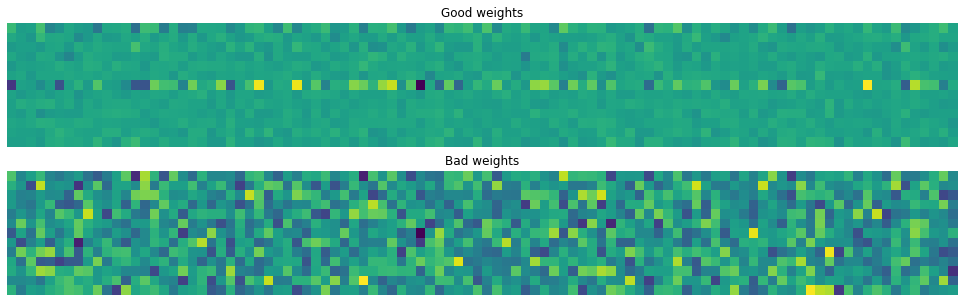

In [32]:
import matplotlib.pyplot as plt

print(niceGotoAgent.state_dict().keys())
# 获取第一层权重张量
Goodweights = niceGotoAgent.state_dict()['targetNetworks.1.0.weight'].cpu()
Badweights = badGotoAgent.state_dict()['targetNetworks.1.0.weight'].cpu()
# 将权重张量转换为numpy数组，并可视化

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,5))
ax1.imshow(np.rot90(Goodweights.numpy()))
ax1.set_title('Good weights')
ax1.axis('off')
ax2.imshow(np.rot90(Badweights.numpy()))
ax2.set_title('Bad weights')
ax2.axis('off')
# 显示图表
plt.show()

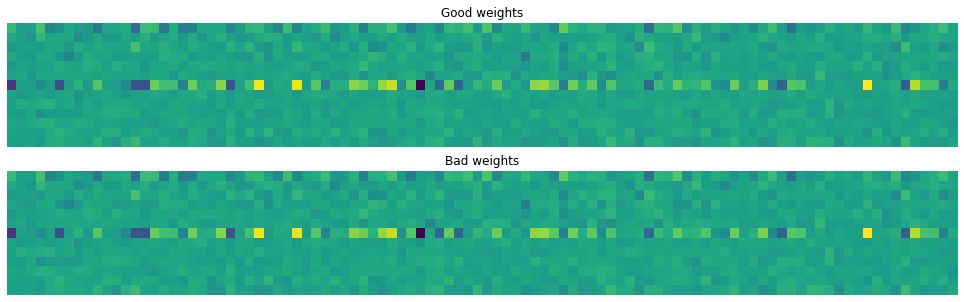

In [34]:
badGotoAgent.targetNetworks[1] = niceGotoAgent.targetNetworks[1]
badGotoAgent.middleNetworks[1] = niceGotoAgent.middleNetworks[1]
badGotoAgent.actor_dis[1] = niceGotoAgent.actor_dis[1]
badGotoAgent.actor_mean[1] = niceGotoAgent.actor_mean[1]
badGotoAgent.actor_logstd[1] = niceGotoAgent.actor_logstd[1]
badGotoAgent.critic[1] = niceGotoAgent.critic[1]
# 获取第一层权重张量
Goodweights = niceGotoAgent.state_dict()['targetNetworks.1.0.weight'].cpu()
Badweights = badGotoAgent.state_dict()['targetNetworks.1.0.weight'].cpu()
# 将权重张量转换为numpy数组，并可视化

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,5))
ax1.imshow(np.rot90(Goodweights.numpy()))
ax1.set_title('Good weights')
ax1.axis('off')
ax2.imshow(np.rot90(Badweights.numpy()))
ax2.set_title('Bad weights')
ax2.axis('off')
# 显示图表
plt.show()

In [35]:
saveDir = "C:/Users/UCUNI/OneDrive/Unity/ML-Agents/Aimbot-PPO/Aimbot-PPO-Python/PPO-Model/Chimera-1677965178-1678547500.pt"
torch.save(badGotoAgent,saveDir)

In [1]:
import torch
print(torch.cuda.is_available())

True
